## Data visualisation and manipulation

In [137]:

import numpy as np # For numporing computation
import pandas as pd #For data handling.
import matplotlib.pyplot as plt #Used for data visualisation purpose.
import seaborn as sb
import numpy.ma as ma
#classifiaction.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [138]:
df = pd.read_csv('winequality-red.csv') #importing the data set

In [139]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [140]:
df.head(10) #head() function is used to get the first n rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [141]:
df.columns # To get the coloumn names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [142]:
df.describe() #To get description of the data in the DataFrame.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [144]:
df.info()#info() method to get information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [145]:
df.shape #o get the number of rows and columns of a given DataFrame T

(1599, 12)

In [146]:
df.isnull().sum() #  to check the number of null values in the dataset columns wise

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

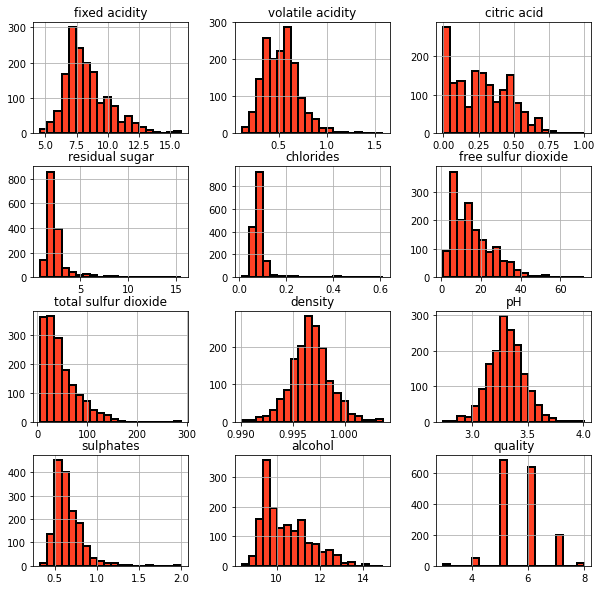

In [147]:
df.hist(bins=20, figsize=(10,10),grid=True,edgecolor='#000000',linewidth=2,color='#ff4125') #A histogram is a representation of the distribution of data on each series in the DataFrame, resulting in one histogram per column.
plt.show()

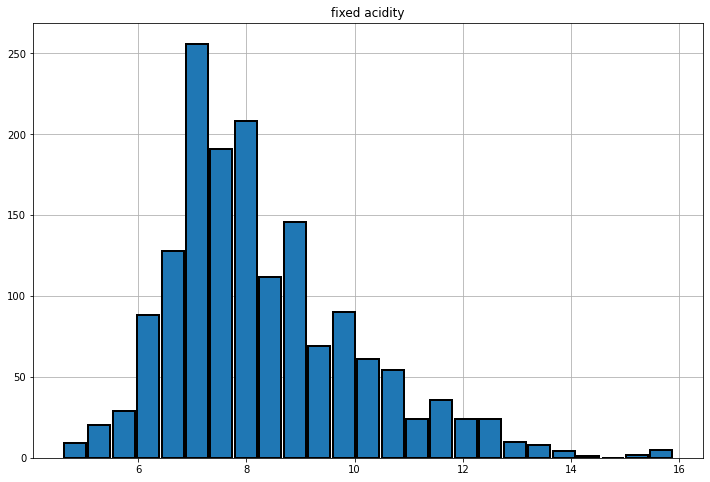

In [148]:
ax = df.hist(column='fixed acidity', bins=25, figsize=(12,8),edgecolor='#000000',linewidth=2, zorder=2, rwidth=0.9,) #To get the detailed info refarding one coloumn

<AxesSubplot:xlabel='quality', ylabel='count'>

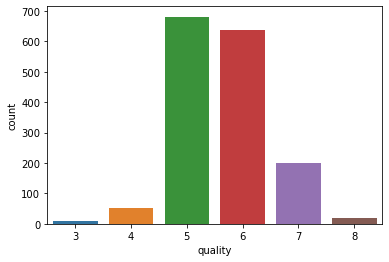

In [149]:
sb.countplot(x='quality', data=df) #

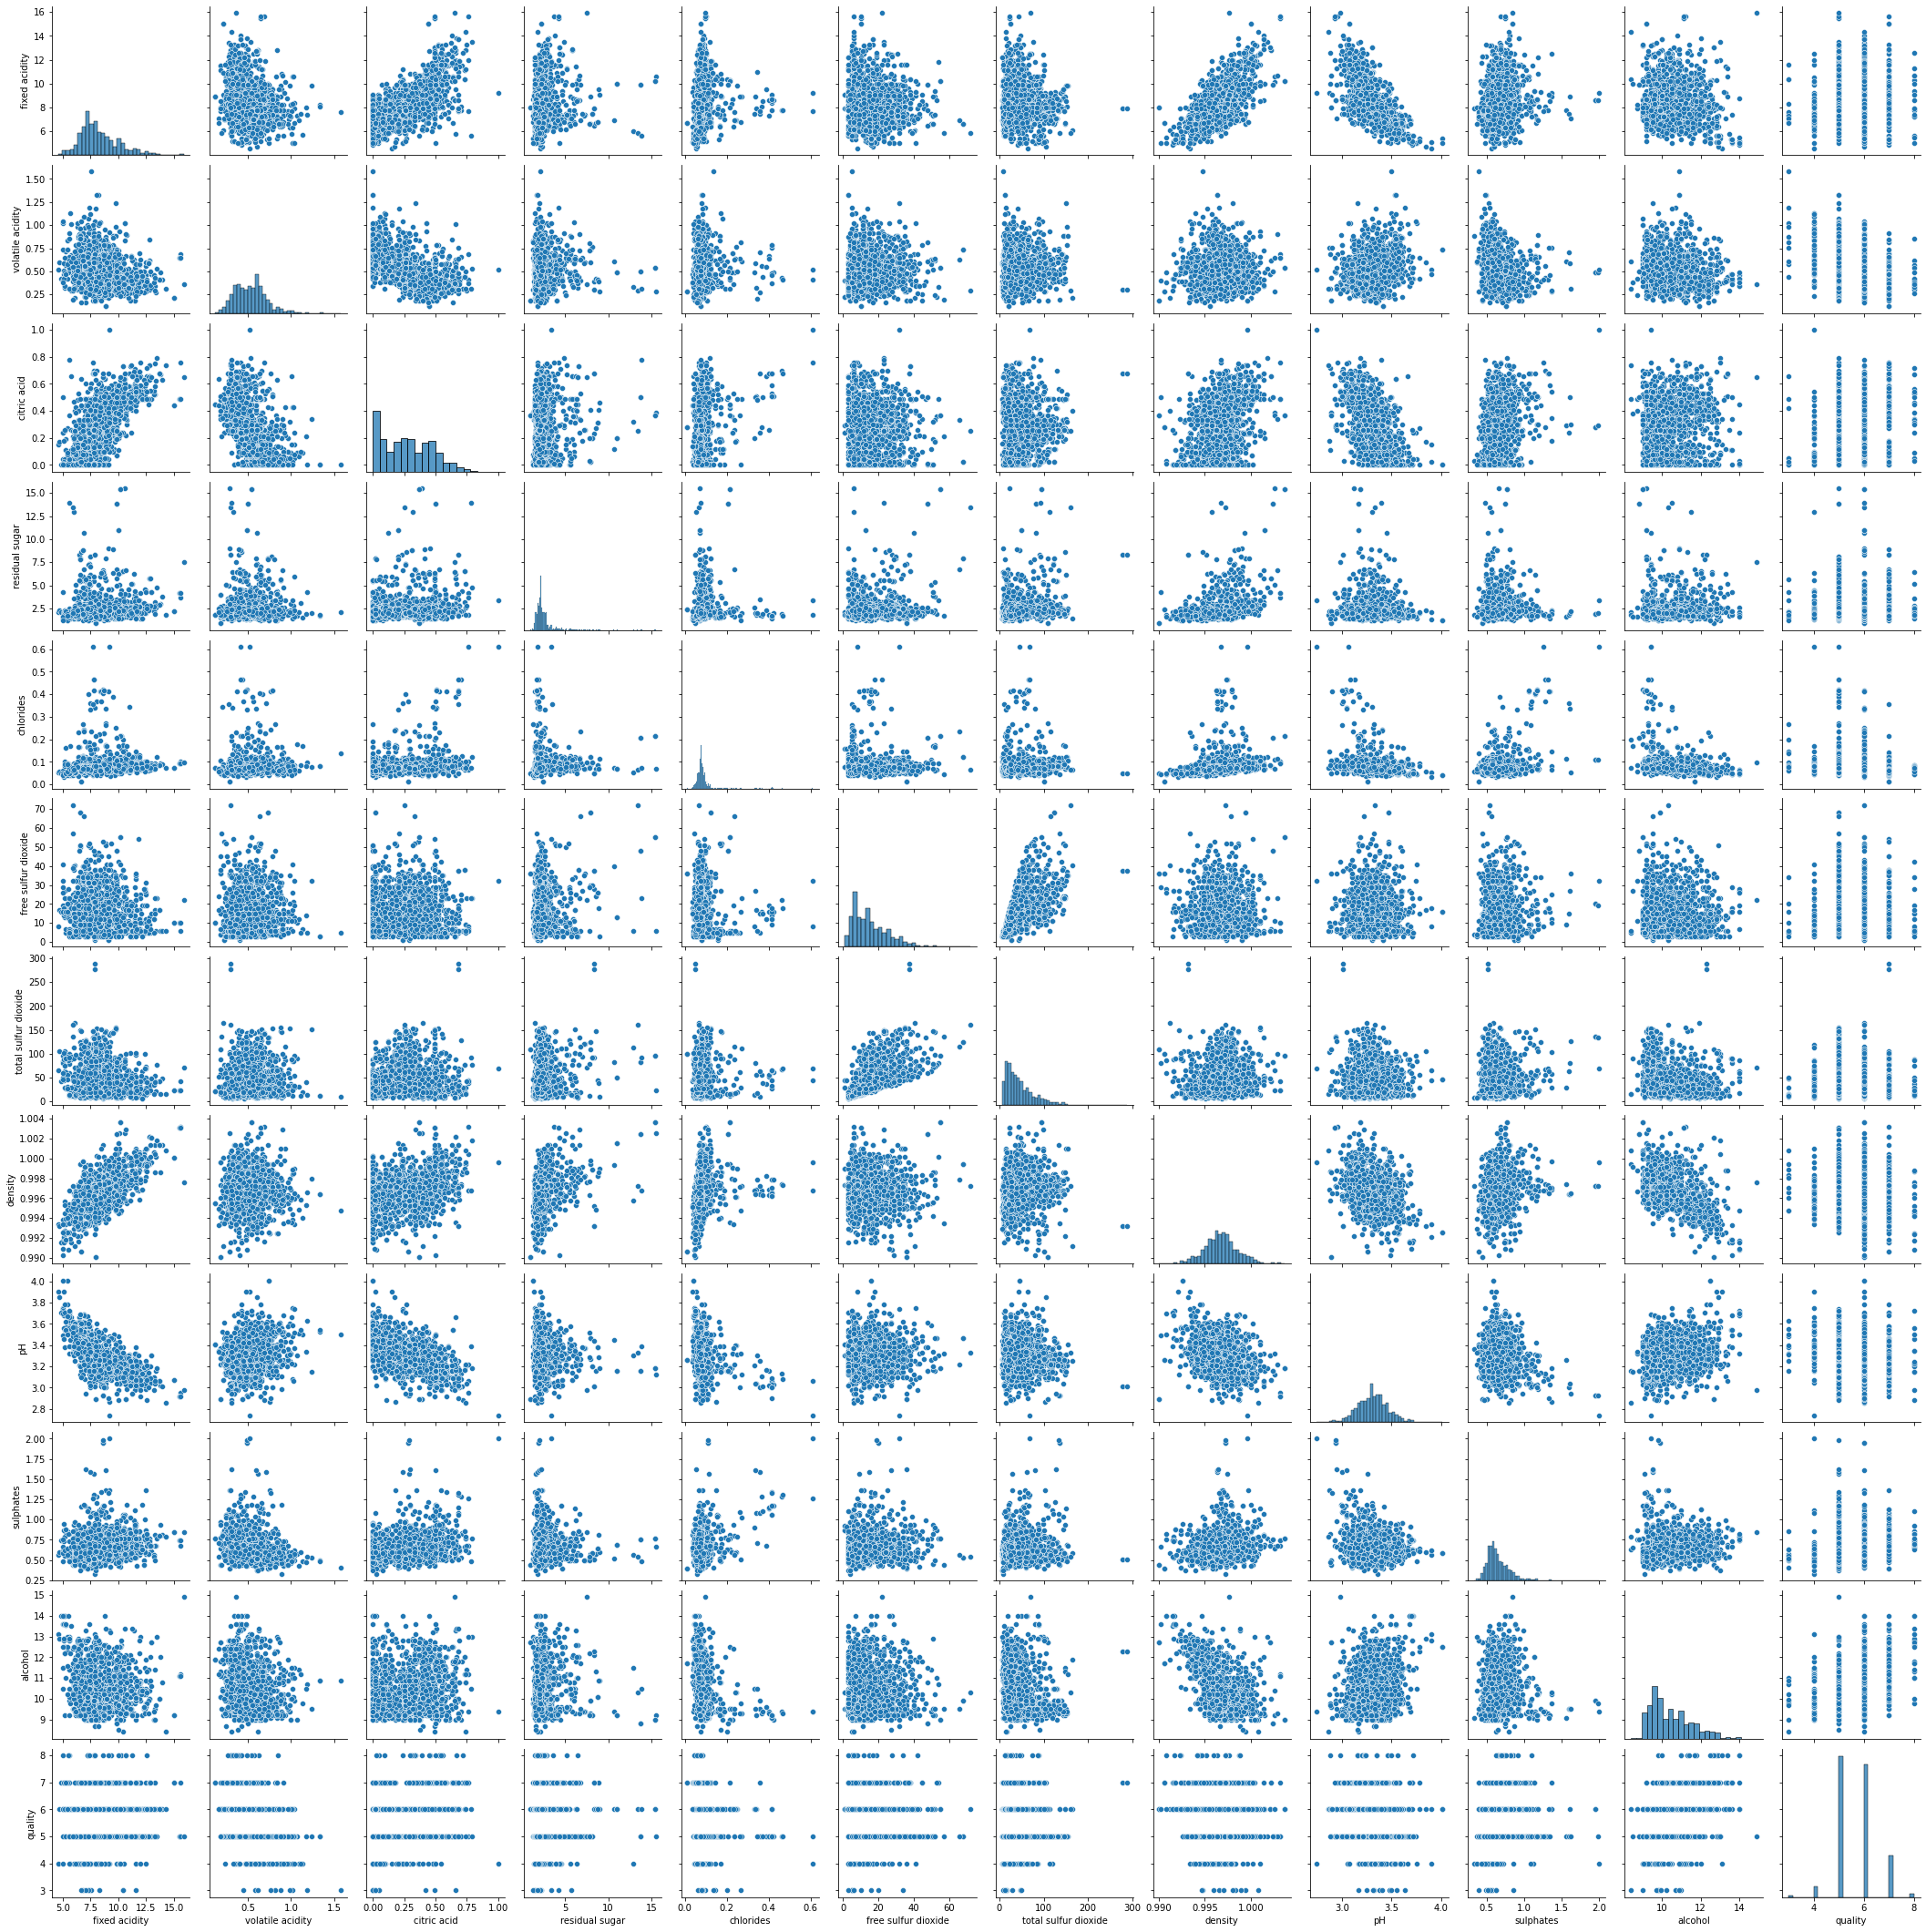

In [150]:
sb.pairplot(df)

<AxesSubplot:>

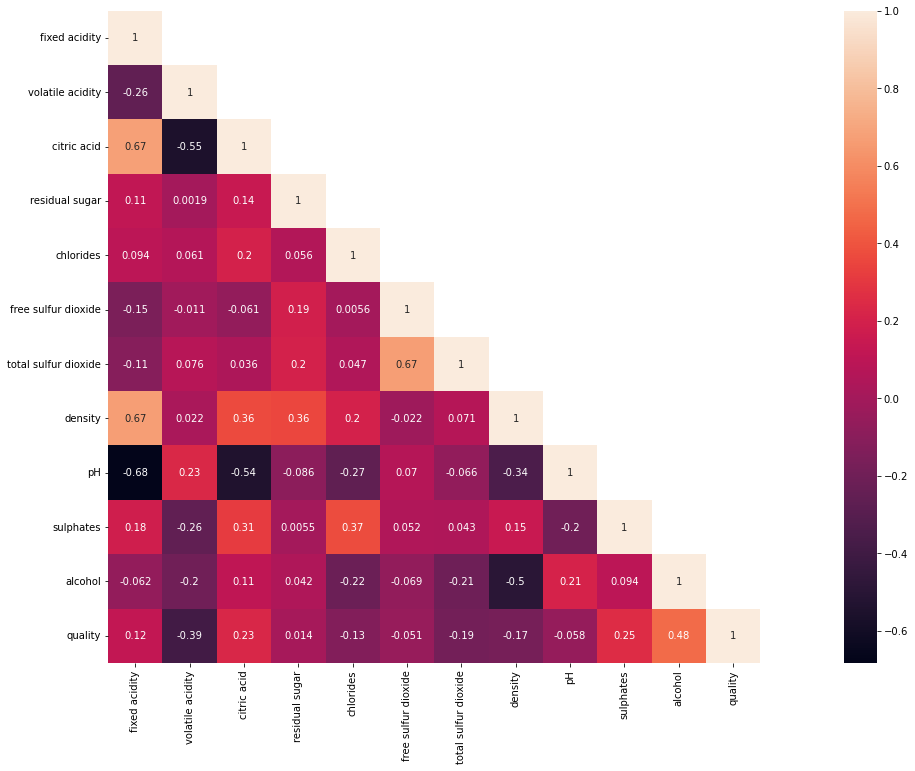

In [151]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sb.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [152]:
#Data Preparation
df['quality'].value_counts(sort=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# visualize how quality varies with different numeric features


In [153]:
def plot(feature_x,target='quality'):
    sb.factorplot(x=target,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sb.factorplot(x=target,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sb.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=5,aspect=1)
    

In [154]:
#Lets check for one categrical variable with quality 

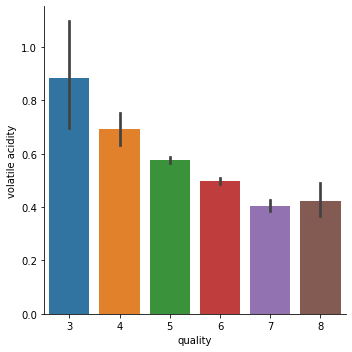

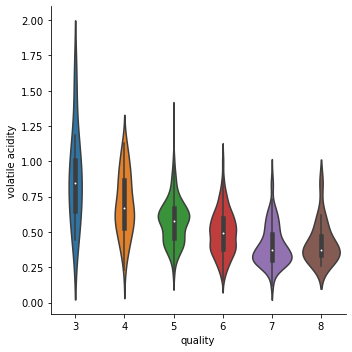

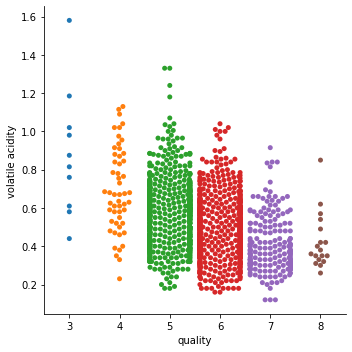

In [155]:
# for volatile acidity.
plot('volatile acidity','quality')

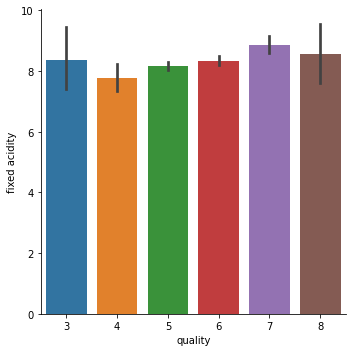

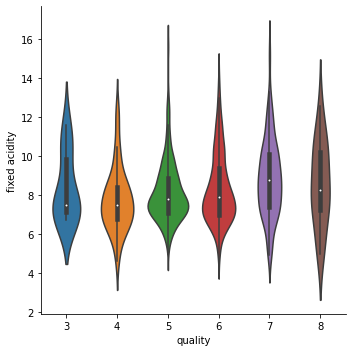

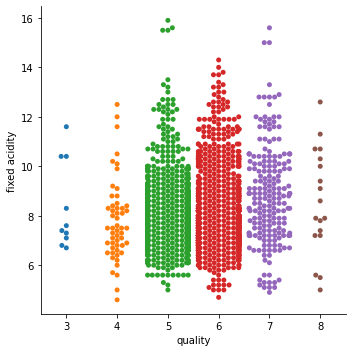

In [156]:
plot('fixed acidity','quality')

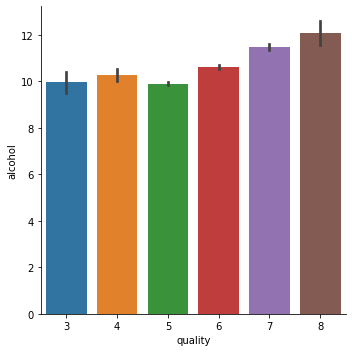

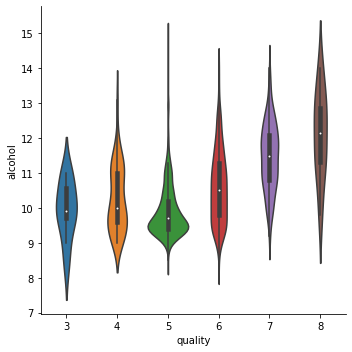

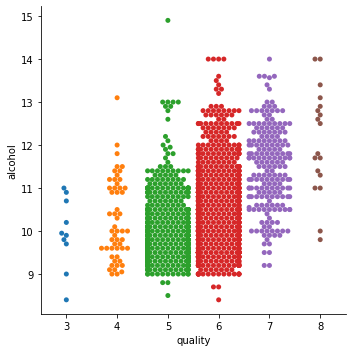

In [157]:
# for alcohol.
plot('alcohol','quality')

# Data modelling with Accuracy

In [158]:
bins = (2, 7, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'],bins = bins, labels = group_names)

In [159]:
label_quality = LabelEncoder() #Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.

In [160]:
df['quality'] = label_quality.fit_transform(df['quality']) #good becomes 1 & Bad becomes 0 

In [161]:
df['quality'].value_counts()

0    1581
1      18
Name: quality, dtype: int64

In [162]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.25,random_state=42)

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.9875, 0.9875, 0.9875, 0.9875, 0.985, 0.975, 0.98, 0.9725]}

In [165]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.9875
1,LinearSVM,0.9875
2,rbfSVM,0.9875
3,KNearestNeighbors,0.9875
4,RandomForestClassifier,0.9850
5,DecisionTree,0.9750
6,GradientBoostingClassifier,0.9800
7,GaussianNB,0.9725


<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algo'>

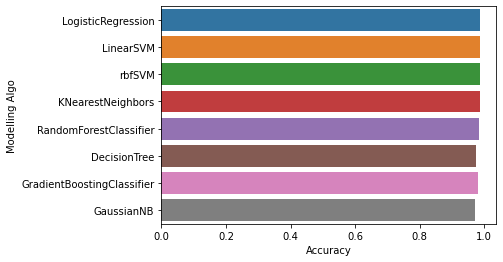

In [166]:
sb.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

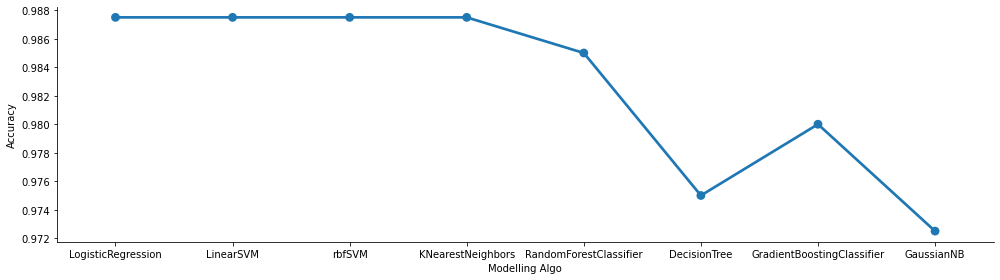

In [167]:
sns.factorplot(x='Modelling Algo',y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5)

### Note That This Is Without Feature Scaling.
### Now Since Features Have Different Scales Let Us Try To Do Feature Scaling And See The Impact.


In [168]:
#Feature scaling is a method used to normalize the range of independent variables or features of data.
def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred,y_test))
     
    acc_frame[name_scaler]=np.array(acc_sc)

In [169]:
scalers=[MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler','Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler=scalers[scale]
    scaler.fit(df)
    scaled_df=scaler.transform(df)
    X=scaled_df[:,0:11]
    Y=df['quality'].to_numpy()
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
    func(x_train,x_test,y_train,y_test,names[scale])
        
    

In [170]:
acc_frame

,Modelling Algo,Accuracy,Acc_Min_Max_Scaler,Acc_Standard_Scaler
0,LogisticRegression,0.9875,0.9875,0.9875
1,LinearSVM,0.9875,0.9875,0.9875
2,rbfSVM,0.9875,0.9875,0.9875
3,KNearestNeighbors,0.9875,0.9875,0.9875
4,RandomForestClassifier,0.9850,0.9875,0.9875
5,DecisionTree,0.9750,0.9725,0.9775
6,GradientBoostingClassifier,0.9800,0.9800,0.9750
7,GaussianNB,0.9725,0.9725,0.9725


### Now This Clearly Shows The Accuarcies Of Different Modelling Algos On Using Different Scalers.
### Note That Here The Accuracies Increase Marginally On Scaling.

### Also For This Data, Standardscaling Seems To Give Slightly Better Results Than The Minmaxscaling.

### For Some Modelling Algos There Is A Considerable Increase In Accuracies Upon Scaling The Features Like Svm, Knn Wheras For Others There Isn't A Considerable Increase In Accuracies Upon Scaling.

<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algo'>

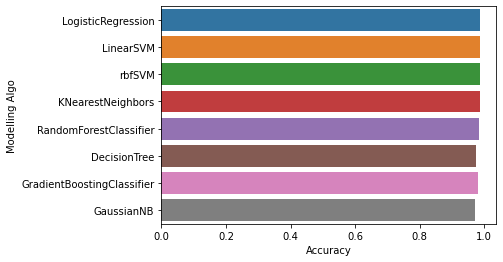

In [171]:
# just to visualize the accuracies.
sb.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

<AxesSubplot:xlabel='Acc_Min_Max_Scaler', ylabel='Modelling Algo'>

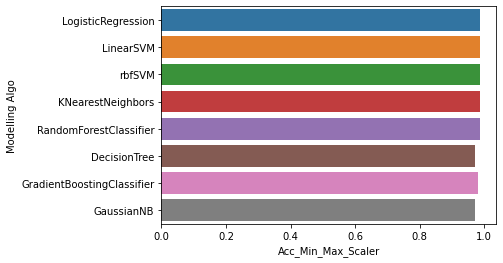

In [172]:
sns.barplot(y='Modelling Algo',x='Acc_Min_Max_Scaler',data=acc_frame)

<AxesSubplot:xlabel='Acc_Standard_Scaler', ylabel='Modelling Algo'>

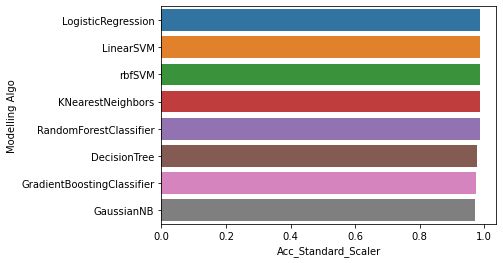

In [173]:
sns.barplot(y='Modelling Algo',x='Acc_Standard_Scaler',data=acc_frame)

In [174]:
# preparing the features by using a StandardScaler as it gave better resluts.
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
X=scaled_df[:,0:11]
Y=df['quality'].to_numpy()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# LETS GO ONTO PARAMETER TUNING PART.

### 1.   LOGISTIC REGRESSION.

In [175]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [176]:
clf_lr.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [177]:
clf_lr.best_score_

0.9891596638655462

In [178]:
clf_lr.best_score_ 

0.9891596638655462

In [179]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

0.9875

In [180]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

0.9875

### 2. KNN.

In [181]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [182]:
clf_knn.best_score_

0.9891596638655462

In [183]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 4}

In [184]:
clf_knn.cv_results_

{'mean_fit_time': array([0.00319102, 0.00319092, 0.00435517, 0.00239315, 0.00209663,
        0.00378273, 0.00099337, 0.0018995 , 0.00209348, 0.00159571,
        0.00159667, 0.00209467, 0.00159838, 0.00189774, 0.0021934 ,
        0.00199554, 0.00247412, 0.00159731, 0.00210845, 0.00159283,
        0.00139649, 0.0015954 , 0.00158761, 0.00178552, 0.00315762,
        0.00189164, 0.0022356 , 0.00196149, 0.00169427, 0.00170534,
        0.00269096, 0.00139933, 0.0016963 , 0.00188897, 0.00149527,
        0.00120425, 0.00296474, 0.01026523, 0.        , 0.00290623,
        0.0010967 , 0.00301428, 0.00169566, 0.00159252, 0.00129273,
        0.00159621, 0.00109539, 0.00199261, 0.00756891, 0.0014926 ]),
 'std_fit_time': array([0.00039886, 0.00116292, 0.00387122, 0.0011111 , 0.00169955,
        0.00453418, 0.00099341, 0.00030082, 0.00029925, 0.00079786,
        0.00048854, 0.00029924, 0.00066321, 0.00030043, 0.00039747,
        0.00044073, 0.00459457, 0.00079501, 0.00442528, 0.00065767,
        0.000

In [185]:
pred=clf_knn.predict(x_test)
accuracy_score(pred,y_test)

0.9875

###   3. RANDOM FOREST.

In [186]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500]},
             scoring='accuracy')

In [187]:
clf_rf.best_score_

0.990826330532213

In [188]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500}

In [194]:
pred=clf_rf.predict(x_test)
accuracy_score(pred,y_test)

0.9875

### 4. GRADIENT BOOSTING.

In [195]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [196]:
clf_gb.best_score_

0.9874929971988795

In [197]:
clf_gb.best_params_

{'n_estimators': 500}

In [198]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.98